<a href="https://colab.research.google.com/github/BhaveshVadher1/Jamboree-Education---Linear-Regression/blob/main/Jamboree__Business_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import copy
import re
from matplotlib import pyplot as plt
df=pd.read_csv('/content/drive/MyDrive/Jamboree_Data.csv')

#Context
Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.

They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score

from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

#Exploratory Data Analysis

In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.shape

(500, 9)

In [ ]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [ ]:
# Missing value detection
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [ ]:
# Number of unique values in each column
for i in df.columns:
  print(i, ':', df[i].nunique())

Serial No. : 500
GRE Score : 49
TOEFL Score : 29
University Rating : 5
SOP : 9
LOR  : 9
CGPA : 184
Research : 2
Chance of Admit  : 61


In [ ]:
#Statistical summary of the dataset
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
       Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  500.000000  500.000000   500.000000         500.000000  500.000000   
mean   250.500000  316.472000   107.192000           3.114000    3.374000   
std    144.481833   11.295148     6.081868           1.143512    0.991004   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    125.750000  308.000000   103.000000           2.000000    2.500000   
50%    250.500000  317.000000   107.000000           3.000000    3.500000   
75%    375.250000  325.000000   112.000000           4.000000    4.000000   
max    500.000000  340.000000   120.000000           5.000000    5.000000   

            LOR         CGPA    Research  Chance of Admit   
count  500.00000  500.000000  500.000000         500.00000  
mean     3.48400    8.576440    0.560000           0.72174  
std      0.92545    0.604813    0.496884           0.14114  
min      1.00000    6.800000    0.000000

In [ ]:
cat_cols = ['University Rating', 'SOP', 'Chance of Admit ', 'Research']
num_cols = ['GRE Score', 'TOEFL Score', 'CGPA']
target = 'Chance of Admit '

##Univariate Analysis

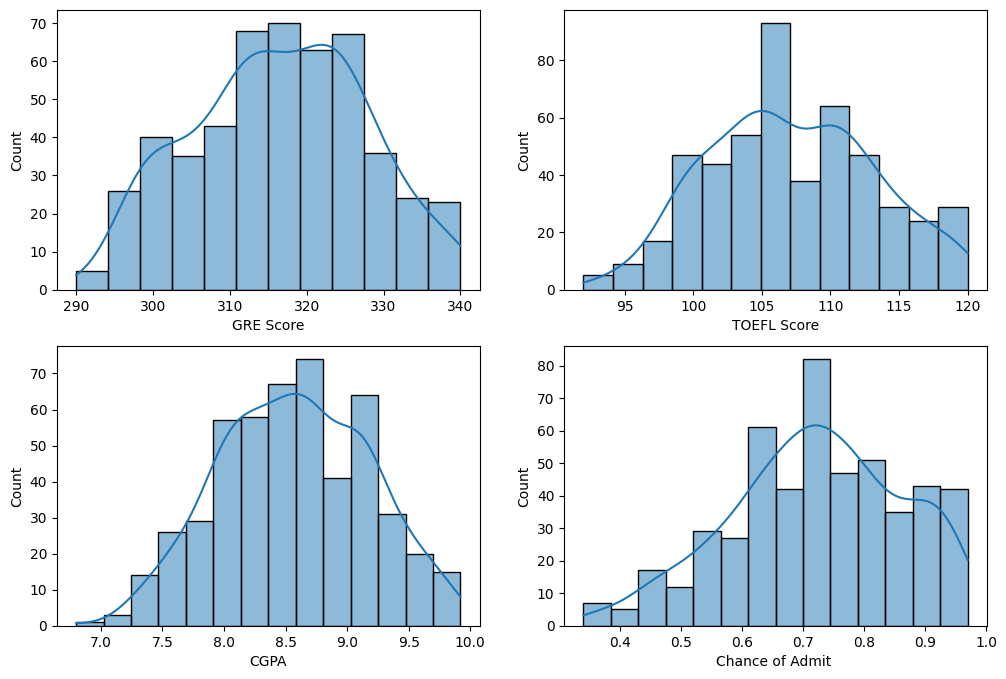

In [ ]:
# check distribution of each numerical variable
rows, cols = 2, 2
fig, axs = plt.subplots(rows,cols, figsize=(12, 8))
index = 0
for row in range(rows):
    for col in range(cols):
        sns.histplot(df[num_cols[index]], kde=True, ax=axs[row,col])
        index += 1
    break

sns.histplot(df[num_cols[-1]], kde=True, ax=axs[1,0])
sns.histplot(df[target], kde=True, ax=axs[1,1])
plt.show()

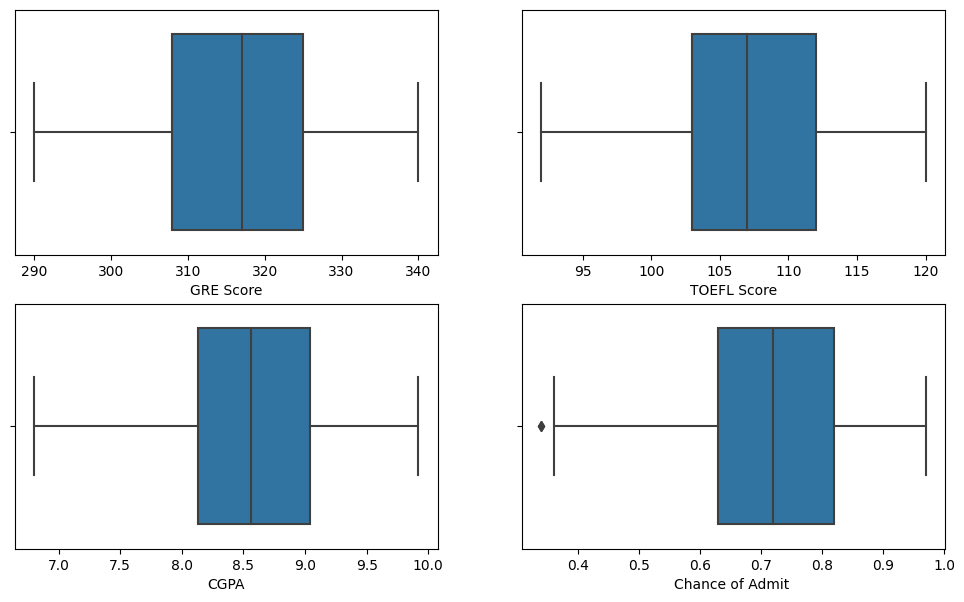

In [ ]:
# check for outliers using boxplots
rows, cols = 2, 2
fig, axs = plt.subplots(rows, cols, figsize=(12, 7))

index = 0
for col in range(cols):
    sns.boxplot(x=num_cols[index], data=df, ax=axs[0,index])
    index += 1

sns.boxplot(x=num_cols[-1], data=df, ax=axs[1,0])
sns.boxplot(x=target, data=df, ax=axs[1,1])
plt.show()

In [ ]:
# check unique values in categorical variables
for col in cat_cols:
    print("Column:  {:18}   Unique values: {}".format(col, df[col].nunique()))

Column:  University Rating    Unique values: 5
Column:  SOP                  Unique values: 9
Column:  Chance of Admit      Unique values: 61
Column:  Research             Unique values: 2


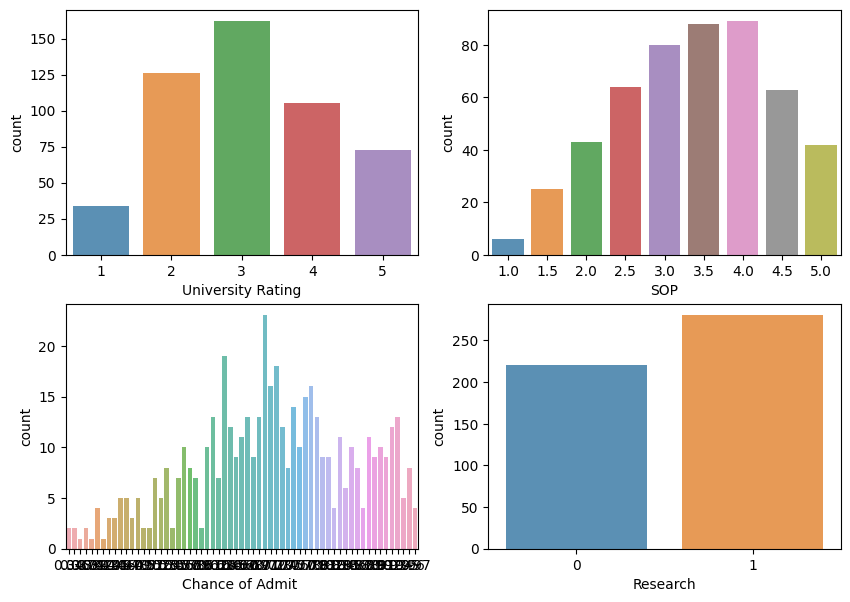

In [ ]:
# countplots for categorical variables
cols, rows = 2, 2
fig, axs = plt.subplots(rows, cols, figsize=(10, 7))

index = 0
for row in range(rows):
    for col in range(cols):
        sns.countplot(x=cat_cols[index], data=df, ax=axs[row, col], alpha=0.8)
        index += 1

plt.show()

##Bivariate Analysis

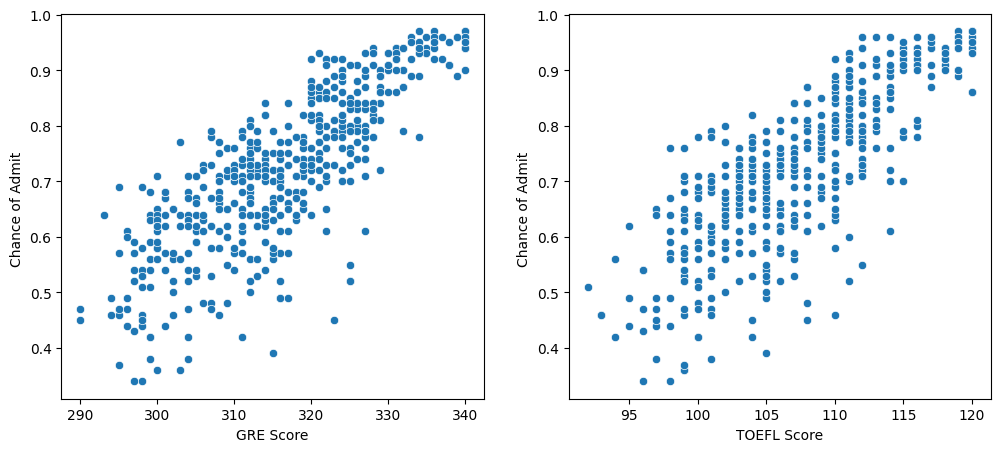

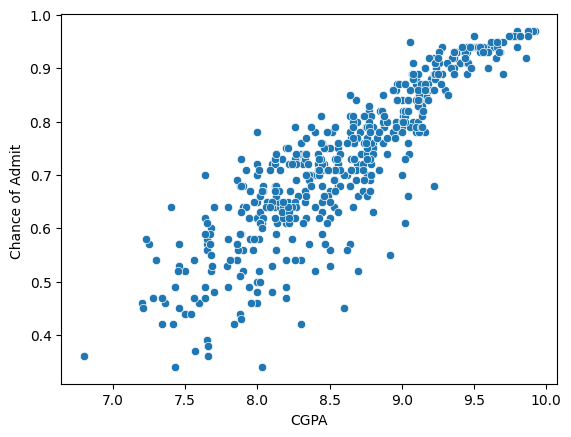

In [ ]:
# check relation bw continuous variables & target variable
fig, axs = plt.subplots(1, 2, figsize=(12,5))

sns.scatterplot(x=num_cols[0], y=target, data=df, ax=axs[0])
sns.scatterplot(x=num_cols[1], y=target, data=df, ax=axs[1])
plt.show()
sns.scatterplot(x=num_cols[2], y=target, data=df)
plt.show()

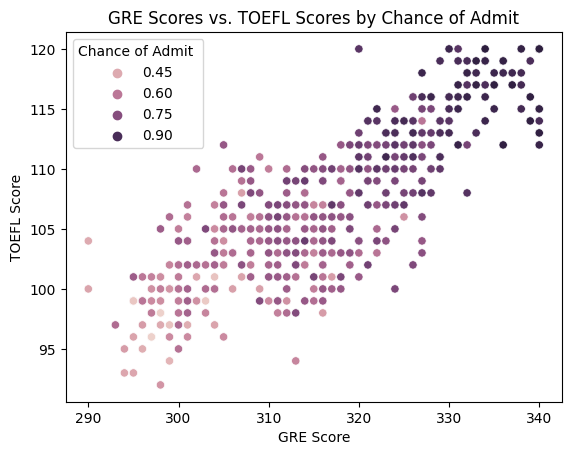

In [ ]:
sns.scatterplot(data=df, x='GRE Score', y='TOEFL Score', hue='Chance of Admit ')
plt.title('GRE Scores vs. TOEFL Scores by Chance of Admit')
plt.show()

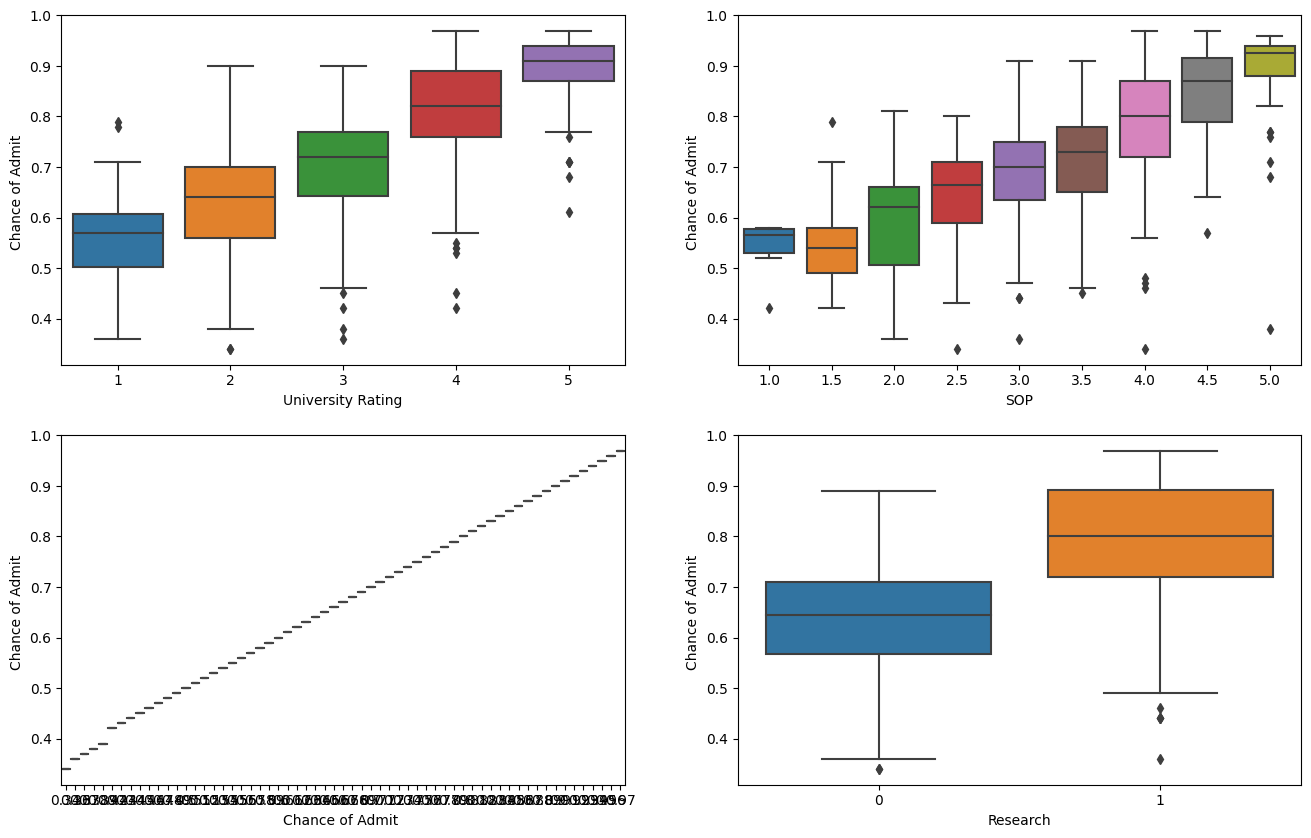

In [ ]:
rows, cols = 2,2
fig, axs = plt.subplots(rows, cols, figsize=(16,10))

index = 0
for row in range(rows):
    for col in range(cols):
        sns.boxplot(x=cat_cols[index], y=target, data=df, ax=axs[row,col])
        index += 1

##Multivariate Analysis

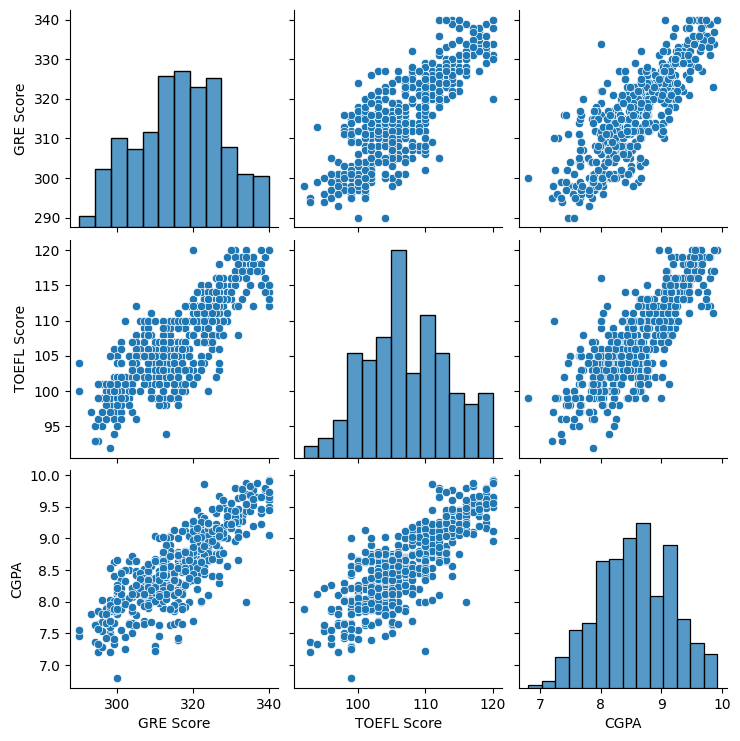

In [ ]:
sns.pairplot(df[num_cols])
plt.show()

In [ ]:
df.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


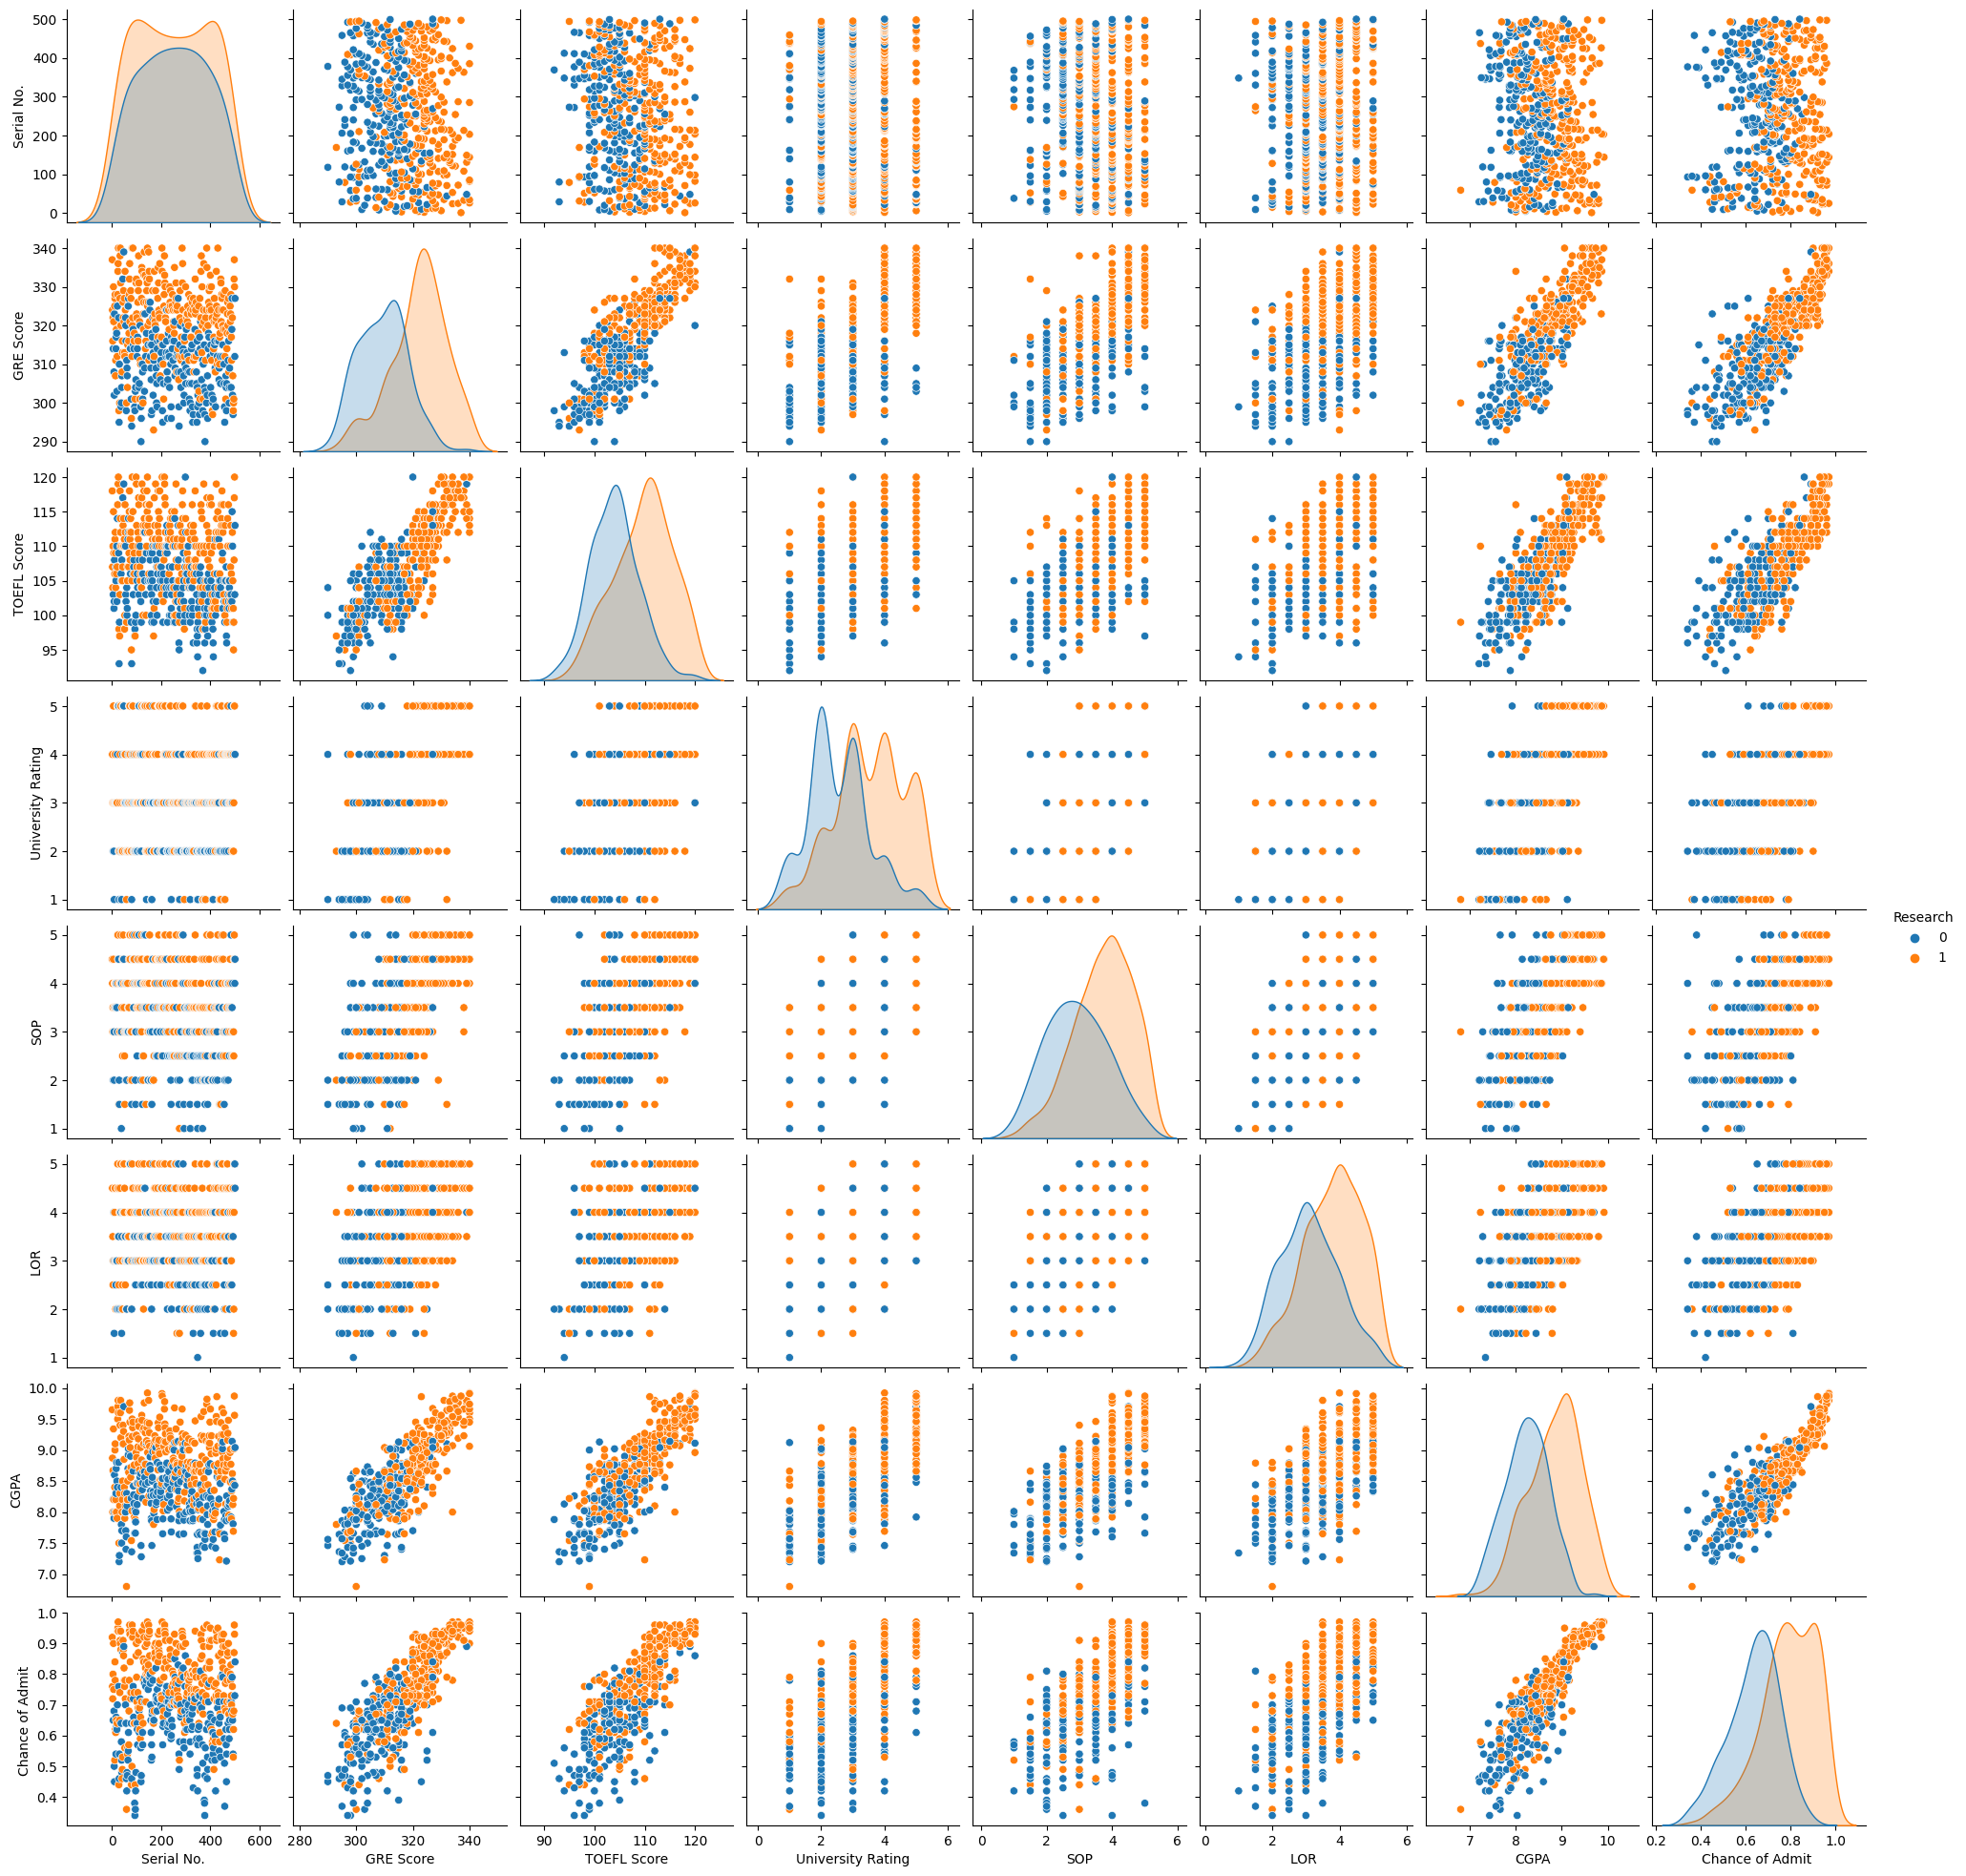

In [ ]:
sns.pairplot(df,hue='Research')

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

##Insignts From EDA
* Based on the above graph we donot have outliers for "'GRE Score', 'TOEFL Score' & 'CGPA'.

* 'Chance of Admit' is slightly left screwed. Since 'Chance of Admit' is a slightly left skewed, we don't have to handle it.

* More than 50% of the data has a university rating of 3 or 2
A majority of students (56%) have letter of recommendation values between 3.0 and 4.5
* A strong positive relationship exists between Chance of admit and numerical variables (GRE & TOEFL score and CGPA).
* The graph above shows an upward trend for each categorical variable. A higher rating or value increases the chance of admission
* We can see positive relationship between Chance of Admit & all the numerical variables.


#Data Preprocessing
Duplicate value check

Missing value treatment

Outlier treatment

Feature engineering

Data preparation for modeling

In [ ]:
# check for duplicates
df.duplicated()

In [ ]:
# check for duplicates
df.duplicated().sum()

In [ ]:
# check for missing values
df.isnull().sum()

In [ ]:
def detect_outliers(df):
    length_before = len(df)
    Q1 = np.percentile(df, 25)
    Q3 = np.percentile(df, 75)
    IQR = Q3 - Q1
    upperbound = Q3 + 1.5 * IQR
    lowerbound = Q1 - 1.5 * IQR

    if lowerbound < 0:
        lowerbound = 0

    length_after = len(df[(df > lowerbound) & (df < upperbound)])
    return f"{np.round((length_before - length_after) / length_before * 100, 4)}% Outliers data from input data found"

In [ ]:
for col in df.columns:
 print(col," : ",detect_outliers(df[col]))

Serial No.  :  0.0% Outliers data from input data found
GRE Score  :  0.0% Outliers data from input data found
TOEFL Score  :  0.0% Outliers data from input data found
University Rating  :  0.0% Outliers data from input data found
SOP  :  0.0% Outliers data from input data found
LOR   :  2.4% Outliers data from input data found
CGPA  :  0.0% Outliers data from input data found
Research  :  44.0% Outliers data from input data found
Chance of Admit   :  0.4% Outliers data from input data found


In [ ]:
detect_outliers(df)

'0.0% Outliers data from input data found'

In [ ]:
#feature creation
df1= df.copy()
df1['Score Average'] = df1[['GRE Score', 'TOEFL Score']].mean(axis=1)

# Display the updated DataFrame with the new feature
df1.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Score Average
0,1,337,118,4,4.5,4.5,9.65,1,0.92,227.5
1,2,324,107,4,4.0,4.5,8.87,1,0.76,215.5
2,3,316,104,3,3.0,3.5,8.00,1,0.72,210.0
3,4,322,110,3,3.5,2.5,8.67,1,0.80,216.0
4,5,314,103,2,2.0,3.0,8.21,0,0.65,208.5


In [ ]:
df1['Overall Rating'] = (df1['University Rating'] + df1['SOP'] + df1['LOR ']) / 3

# Display the updated df1
print("df1 with added features:")
df1.head()

df1 with added features:


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Score Average,Overall Rating
0,1,337,118,4,4.5,4.5,9.65,1,0.92,227.5,4.333333
1,2,324,107,4,4.0,4.5,8.87,1,0.76,215.5,4.166667
2,3,316,104,3,3.0,3.5,8.00,1,0.72,210.0,3.166667
3,4,322,110,3,3.5,2.5,8.67,1,0.80,216.0,3.000000
4,5,314,103,2,2.0,3.0,8.21,0,0.65,208.5,2.333333


In [ ]:
# Data preparation for modeling
#Removing Unwanted Column

df.drop(columns=['Serial No.'],inplace=True)

#Model building
Build the Linear Regression model and comment on the model statistics

Display model coefficients with column names

Try out Ridge and Lasso regression

In [ ]:
# Data preparation for modeling
x = df.drop(['Chance of Admit '], axis = 1)
y = df['Chance of Admit ']


In [ ]:
#Standarization

standardizer = StandardScaler()
standardizer.fit(x)
x = standardizer.transform(x) # standardising the data


In [ ]:
#train Test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(400, 7) (400,)
(100, 7) (100,)


In [ ]:
y_train.shape, y_test.shape


((400,), (100,))

In [ ]:
# Build a Linear Regression Model

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
print("Model Coefficient for Linear Regression with respect to column names")
print()
for i in range(len(model.coef_)):
  print(df.columns[i], '----->', model.coef_[i])

Model Coefficient for Linear Regression with respect to column names

GRE Score -----> 0.026392544332451178
TOEFL Score -----> 0.014616974637883785
University Rating -----> 0.00635779846124452
SOP -----> 0.0013869073454199285
LOR  -----> 0.014958496363541495
CGPA -----> 0.0696142734586645
Research -----> 0.009183890282334998


In [ ]:
# Build a Ridge and Lasso Regresison

from sklearn.linear_model import Lasso

model = LinearRegression()
model.fit(x_train, y_train)

print("Model Coefficient for Lasso with respect to column names")
print()
for i in range(len(model.coef_)):
  print(df.columns[i], '----->', model.coef_[i])


Model Coefficient for Lasso with respect to column names

GRE Score -----> 0.026392544332451178
TOEFL Score -----> 0.014616974637883785
University Rating -----> 0.00635779846124452
SOP -----> 0.0013869073454199285
LOR  -----> 0.014958496363541495
CGPA -----> 0.0696142734586645
Research -----> 0.009183890282334998


In [ ]:
from sklearn.linear_model import Lasso,Ridge,LinearRegression

model1 = LinearRegression()
model1.fit(x_train, y_train)

model2 = Lasso(alpha = 1.0)
model2.fit(x_train, y_train)

model3 = Ridge(alpha = 0.5)
model3.fit(x_train, y_train)

data = []

for i in range(len(df.columns)-1):
  obj = {}
  obj['Columns'] = df.columns[i]
  obj['Linear Regression'] = model1.coef_[i]
  obj['Lasso Regression'] = model2.coef_[i]
  obj['Ridge Regression'] = model3.coef_[i]

  data.append(obj)
pd.DataFrame(data)

,Columns,Linear Regression,Lasso Regression,Ridge Regression
0,GRE Score,0.026393,0.0,0.026445
1,TOEFL Score,0.014617,0.0,0.014701
2,University Rating,0.006358,0.0,0.006400
3,SOP,0.001387,0.0,0.001450
4,LOR,0.014958,0.0,0.014980
5,CGPA,0.069614,0.0,0.069323
6,Research,0.009184,0.0,0.009200


In [ ]:
r2_score(y_train,model.(x_train))

SyntaxError: ignored

#Testing the assumptions of the linear regression model
Multicollinearity check by VIF score (variables are dropped one-by-one till none has VIF>5) (10 Points)

The mean of residuals is nearly zero (10 Points)

Linearity of variables (no pattern in the residual plot) (10 Points)

Test for Homoscedasticity (10 Points)

Normality of residuals (almost bell-shaped curve in residuals distribution, points in QQ plot are almost all on the line) (10 Points)

In [ ]:
#Multicollinearity check by VIF score (variables are dropped one-by-one till none has VIF>5)
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(dataset,col):
    dataset=dataset.drop(columns=col,axis=1)
    vif=pd.DataFrame()
    vif['features']=dataset.columns
    vif['VIF_Value']=[variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])]
    return vif

In [ ]:
x_train.columns

In [ ]:
train_model(x_train, y_train, x_test, y_test,df.columns[:-1], "ridge")
train_model(x_train, y_train, x_test, y_test,df.columns[:-1], "lasso", 0.001)

In [ ]:
for col in x_train.columns:
  print('******* VIF when', col, 'is dropped *******')
  print(calculate_vif(x_train.drop(columns = [col]), []))
  print('------------------------------')

In [ ]:
#Mutlicollinearity Check
def vif(newdf):
    # VIF dataframe
    vif_data = pd.DataFrame()
    vif_data["feature"] = newdf.columns

    # calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(newdf.values, i)
                              for i in range(len(newdf.columns))]
    return vif_data

In [ ]:
res = vif(df.iloc[:,:-1])
res

In [ ]:
# drop GRE Score and again calculate the VIF
res = vif(df.iloc[:, 1:-1])
res

In [ ]:
# drop TOEFL Score and again calculate the VIF
res = vif(df.iloc[:,2:-1])
res

In [ ]:
# Now lets drop the SOP and again calculate VIF
res = vif(df.iloc[:,2:-1].drop(columns=['SOP']))
res

In [ ]:
# lets drop the LOR as well
newdf = df.iloc[:,2:-1].drop(columns=['SOP'])
newdf = newdf.drop(columns=['LOR '], axis=1)
res = vif(newdf)
res

In [ ]:
# drop the University Rating
newdf = newdf.drop(columns=['University Rating'])
res = vif(newdf)
res

In [ ]:
# now again train the model with these only two features
X = df[['CGPA', 'Research']]
sc = StandardScaler()
X = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
model = train_model(X_train, y_train, X_test, y_test, ['CGPA', 'Research'], "linear")
train_model(X_train, y_train, X_test, y_test, ['CGPA', 'Research'], "ridge")
train_model(X_train, y_train, X_test, y_test, ['CGPA', 'Research'], "lasso", 0.001)

In [ ]:
#Normality of Residuals
y_pred = model.predict(X_test)
residuals = (y_test - y_pred)
sns.histplot(residuals)
plt.show()

In [ ]:
stats.probplot(residuals, plot=plt)
plt.show()

#Model performance evaluation
Metrics checked - MAE, RMSE, R2, Adj R2

Train and test performances are checked

Comments on the performance measures and if there is any need to improve the model or not

#Actionable Insights & Recommendations
Comments on significance of predictor variables

Comments on additional data sources for model improvement, model
implementation in real world, potential business benefits from improving the model (These are key to differentiating a good and an excellent solution)